In [1]:
import pandas as pd

kto_201901 = pd.read_excel('./files/tour_data/kto_201901.xlsx',
                          header=1,
                          usecols='A:G',
                          skipfooter=4)
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [2]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [3]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [4]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [5]:
condition = (kto_201901['관광'] == 0) \
            | (kto_201901['상용'] == 0) \
            | (kto_201901['공용'] == 0) \
            | (kto_201901['유학/연수'] == 0)
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [6]:
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [7]:
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [8]:
continents_list = ['아시아주', '미주', '구주', '대양주', 
                   '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [9]:
condition = (kto_201901.국적.isin(continents_list) == False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [10]:
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [11]:
kto_201901_country.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
59,대양주 기타,555,3,4,0,52,614,2019-01
61,남아프리카공화국,368,9,1,6,616,1000,2019-01
62,아프리카 기타,768,718,90,206,908,2690,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
66,교포,0,0,0,0,15526,15526,2019-01


In [12]:
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True)
kto_201901_country_newindex.head()
# len(kto_201901_country_newindex)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [13]:
kto_201901_country_newindex.tail()


,국적,관광,상용,공용,유학/연수,기타,계,기준년월
55,대양주 기타,555,3,4,0,52,614,2019-01
56,남아프리카공화국,368,9,1,6,616,1000,2019-01
57,아프리카 기타,768,718,90,206,908,2690,2019-01
58,국적미상,33,4,0,1,16,54,2019-01
59,교포,0,0,0,0,15526,15526,2019-01


In [14]:
continents = ['아시아']*25 + ['아메리카']*5 +['유럽']*23 \
                + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
len(continents)

60

In [15]:
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [16]:
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙
59,교포,0,0,0,0,15526,15526,2019-01,교포


In [17]:
kto_201901_country_newindex["관광객비율(%)"] = \
    round(kto_201901_country_newindex['관광'] /
    kto_201901_country_newindex['계'] * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [18]:
kto_201901_country_newindex.sort_values(by="관광객비율(%)", ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [19]:
kto_201901_country_newindex.sort_values(by="관광객비율(%)", ascending = True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


In [20]:
kto_201901_country_newindex.pivot_table(values="관광객비율(%)", index="대륙" ,
                                                                aggfunc = "mean")

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [21]:
condition = (kto_201901_country_newindex['국적'] == '중국')
kto_201901_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [22]:
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [23]:
kto_201901_country_newindex['전체비율(%)'] = \
    round(kto_201901_country_newindex['관광'] / tourist_sum * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [24]:
kto_201901_country_newindex.sort_values("전체비율(%)",
                                       ascending = False)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3,2.2
47,러시아,17260,181,37,191,7525,25194,2019-01,유럽,68.5,2.0
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3,1.6


In [35]:
# 데이터 전처리 함수
def create_kto_data(yy, mm):
    # 1. 불러올 엑셀 파일 경로 지정
    file_path = './files/tour_data/kto_{}{}.xlsx'.format(yy, mm)
    
    # 2. 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header = 1, skipfooter=4, usecols='A:G')
    
    # 3. 기준년월 칼럼 추가
    df['기준년월'] = '{}-{}'.format(yy, mm)
    
    # 4. "국적 칼럼에서 대륙 제거하고 국가만 남기기"
    ignore_list =  ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    condition = (df['국적'].isin(ignore_list) == False) # 대륙 미포함 조건
    df_country = df[condition].reset_index(drop=True)
    
    # 5. "대륙" 칼럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 +['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
    df_country["대륙"] = continents
    
    # 6. 국가별 "관광객비율(%)" 칼럼 추가
    df_country["관광객비율(%)"] = round(df_country.관광 / df_country.계 * 100, 1)
    
    # 7. "전체비율 (%)" 칼럼 추가
    tourist_sum = sum(df_country["관광"])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    # 8. 결과 출력
    return(df_country)

In [26]:
kto_test = create_kto_data(2018,12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [27]:
# kto_yyyymm.xlsx

for yy in range(2010, 2021):
    for mm in range(1, 13):
        yymm = '{}{}'.format(yy, mm)
        print(yymm)

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912
20201
20202
20203
20204
20205
20206
20207
20208
20209
202010
202011
202012


In [28]:
mm = 1
print(mm)
print(str(mm).zfill(2))

1
01


In [29]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [36]:
# 한 파일로 모두 통합
df = pd.DataFrame()

In [37]:
for yy in range(2010, 2021):
    for mm in range(1, 13):
        # 월마다 전처리 함수 실행 -> temp 변수에 저장(temp 임시적인 매개변수)
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        # 작업하고 붙이고 작업하고 붙이고 반복함 = concat
        df = pd.concat([df,temp], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: './files/tour_data/kto_202006.xlsx'

In [38]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [39]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0
7499,교포,0,0,0,0,790,790,2020-05,교포,0.0,0.0


In [34]:
df.to_excel('./files/kto_total.xlsx', index = False)

In [41]:
# 국적별 필터링 하자. 220720 수업시작.
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


In [42]:
file_path = './files/[국적별 관광객 데이터]중국.xlsx'
df_filter.to_excel(file_path, index = False)

In [43]:
cntry_list = df['국적'].unique()
cntry_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [44]:
len(cntry_list)

60

In [46]:
for cntry in cntry_list:
    # 국적으로 필터링
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    # 국적 이름을 반영한 파일명 만들기
    file_path = './files/[국적별 관광객 데이터]{}.xlsx'.format(cntry)
    
    # 정해 높은 파일명으로 저장하기
    df_filter.to_excel(file_path, index = False)

In [47]:
import pandas as pd
df = pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [48]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [49]:
import matplotlib.pyplot as plt

In [50]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


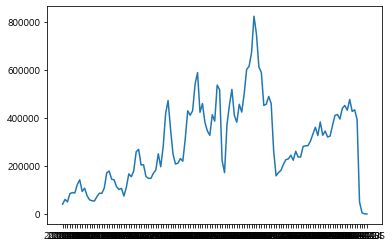

In [51]:
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

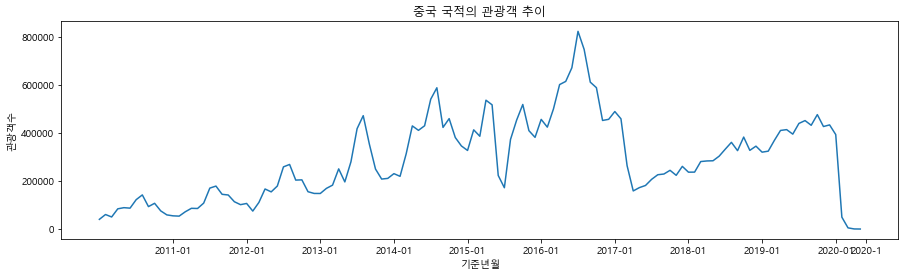

In [55]:
## 그래프 크기 조절
plt.figure(figsize = (15,4))

## 그래프 내용 설정
plt.plot(df_filter['기준년월'], df_filter['관광'])

## 그래프 타이틀, x축, y축 이름 달기
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x축 눈금 값 설정
plt.xticks(['2020-01', '2011-01', '2012-01',
            '2013-01', '2014-01', '2015-01',
            '2016-01', '2017-01', '2018-01', '2019-01', '2020-1'])

## 그래프 표현하기
plt.show()

In [59]:
cntry_list = ['중국', '홍콩', '대만', '일본', '미국']

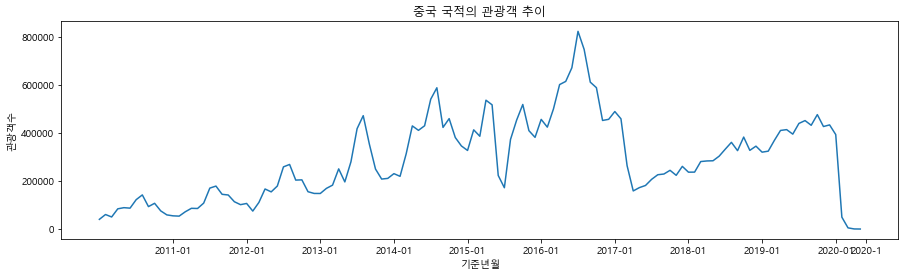

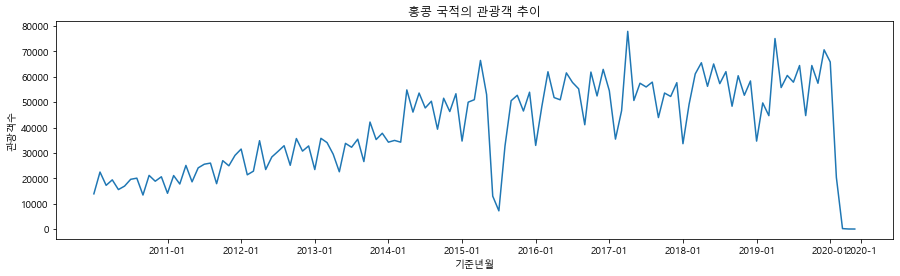

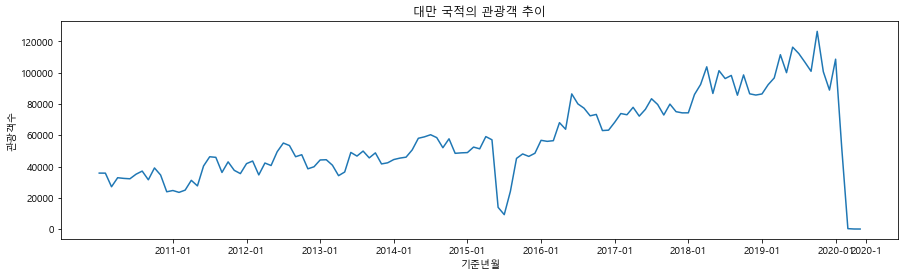

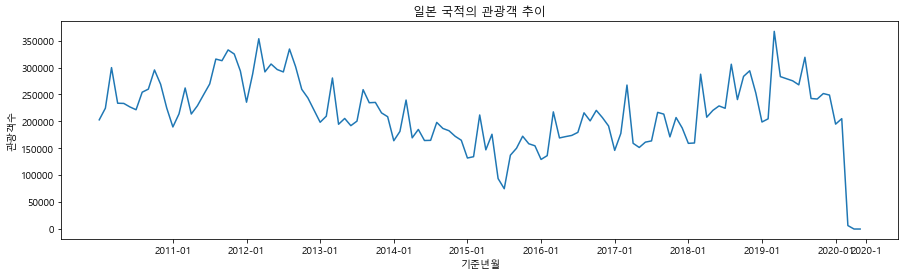

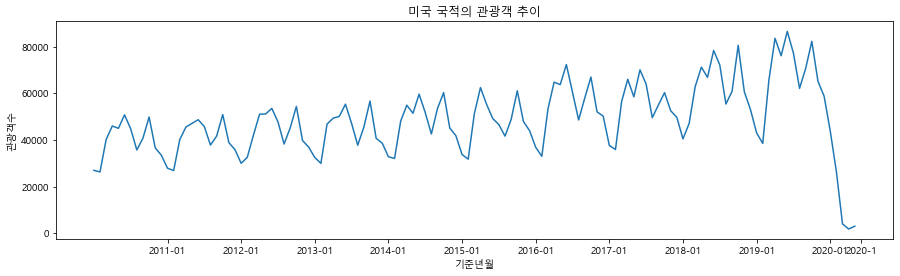

In [62]:
for cntry in cntry_list:
    # 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    ## 그래프 크기 조절
    plt.figure(figsize = (15,4))

    ## 그래프 내용 설정
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    ## 그래프 타이틀, x축, y축 이름 달기
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    ## x축 눈금 값 설정
    plt.xticks(['2020-01', '2011-01', '2012-01',
            '2013-01', '2014-01', '2015-01',
            '2016-01', '2017-01', '2018-01', '2019-01', '2020-1'])

    ## 그래프 표현하기
    plt.show()

In [63]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [64]:
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [65]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [66]:
df_pivot = df_filter.pivot_table(values = '관광',
                                 index = '년도',
                                 columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


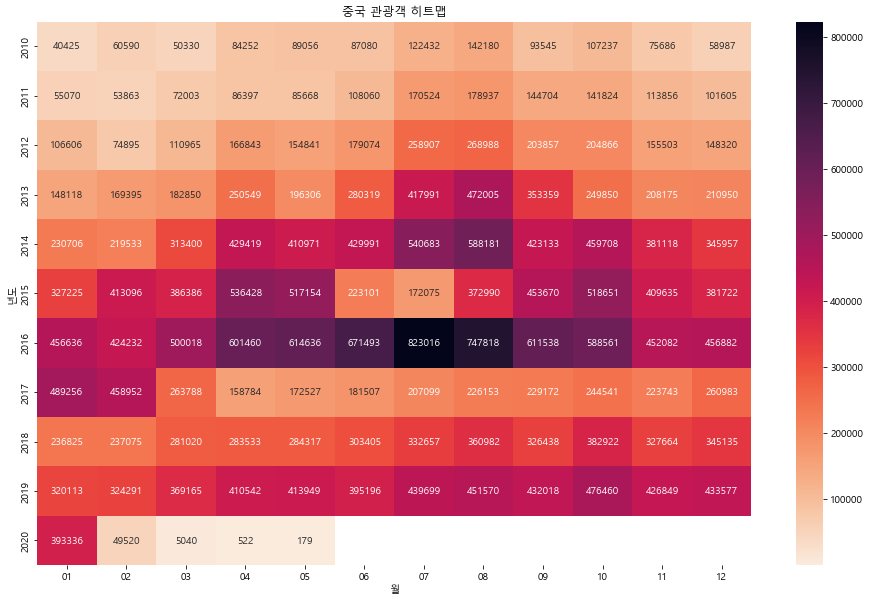

In [73]:
## 그래프 크기 설정
plt.figure(figsize = (16, 10))

## 히트맵 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
## 그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

## 그래프 표현
plt.show()

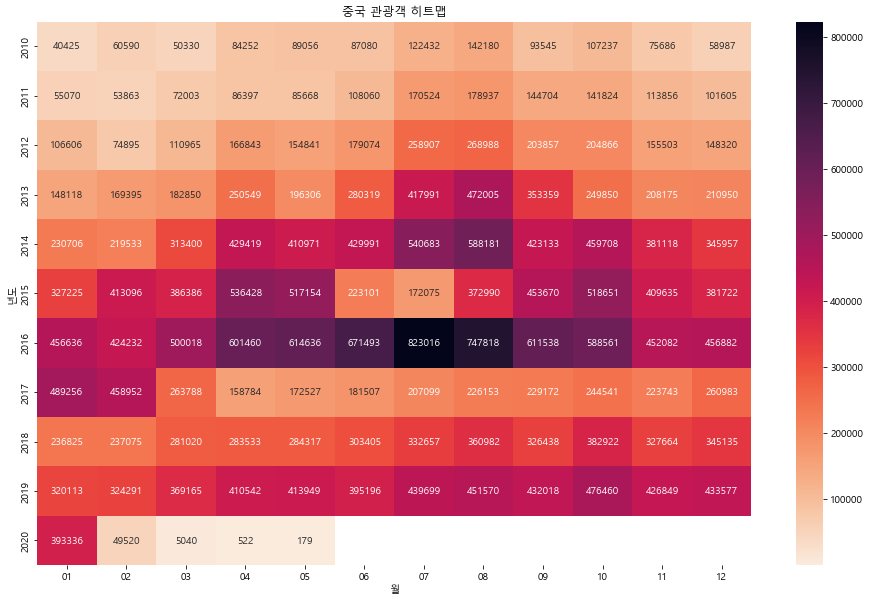

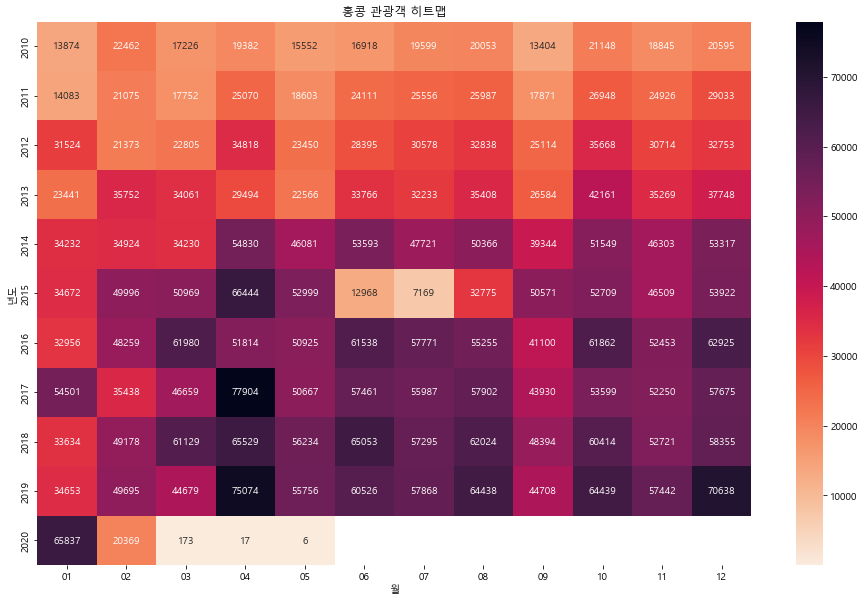

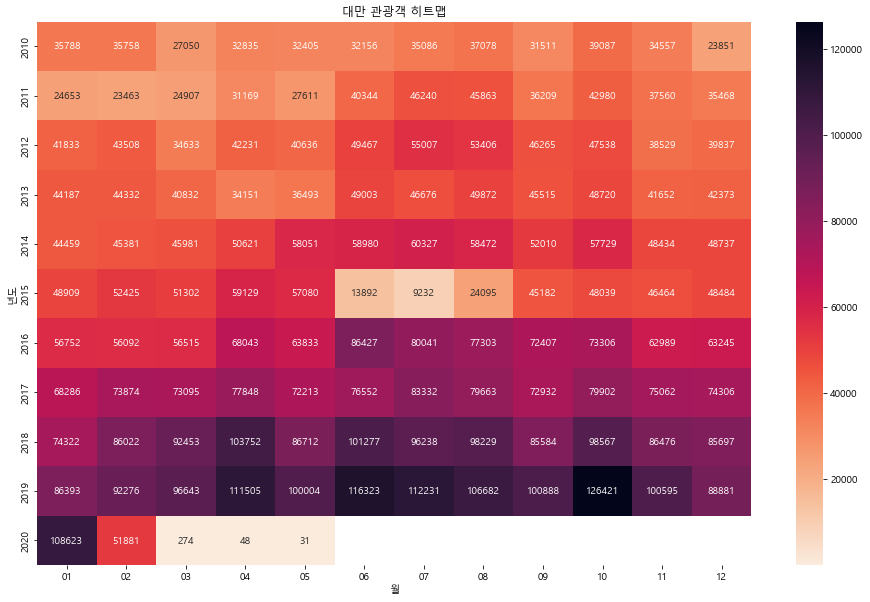

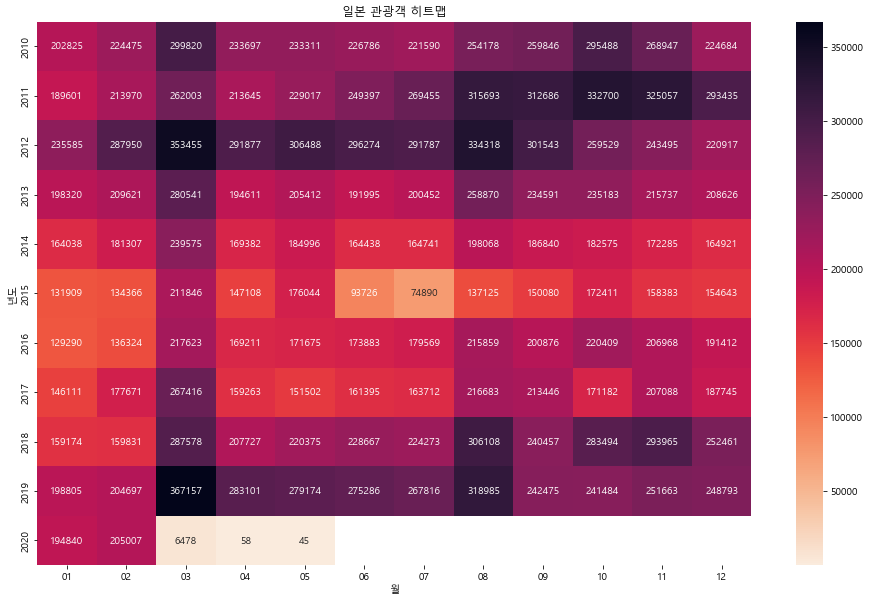

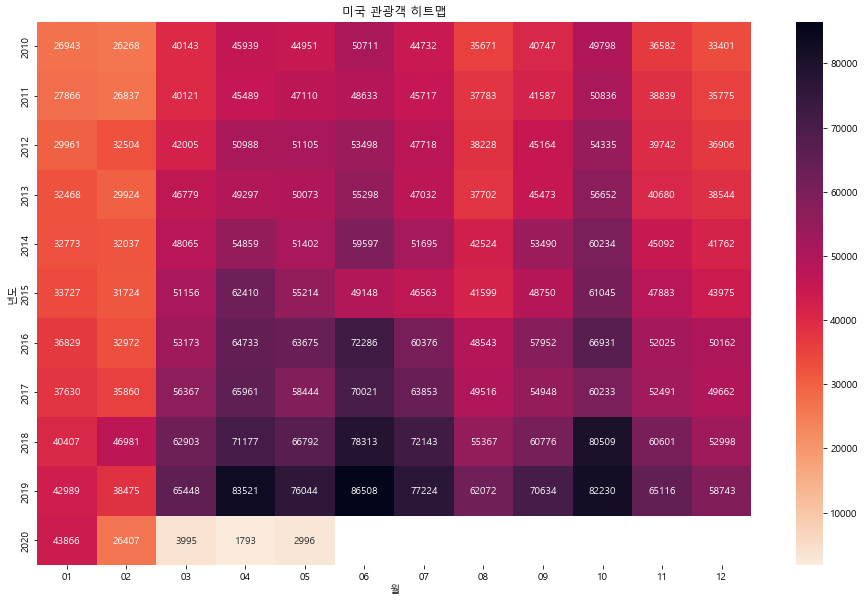

In [75]:
for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    df_filter.head()
    
    df_pivot = df_filter.pivot_table(values = '관광',
                                 index = '년도',
                                 columns = '월')
    ## 그래프 크기 설정
    plt.figure(figsize = (16, 10))

    ## 히트맵 그래프 그리기
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
    ## 그래프 타이틀 달기
    plt.title('{} 관광객 히트맵'.format(cntry))

    ## 그래프 표현
    plt.show()